
@Author: Nagashree C R<br>
@Date: 09-10-2024<br>
@Last modified by: Nagashree C R<br>
@Last modified Date:09-10-2024 <br> 
@Title:predict subscription to term deposite using KNN<br>



### Importing Libraries

In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [15]:
# Load the dataset from the provided Google Drive link
url = 'https://drive.google.com/uc?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn' 
df = pd.read_csv(url,delimiter=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Analysing Dataset

In [16]:
print(df.describe())
print(df.info())
print(df.isnull().sum())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  
<class 'pandas.cor

### Handling Catogrial data

In [17]:
# Select categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Encoding categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])  # Using .loc to avoid SettingWithCopyWarning
    label_encoders[column] = le  # Store the encoder for potential inverse transformation later

### handeling outliers

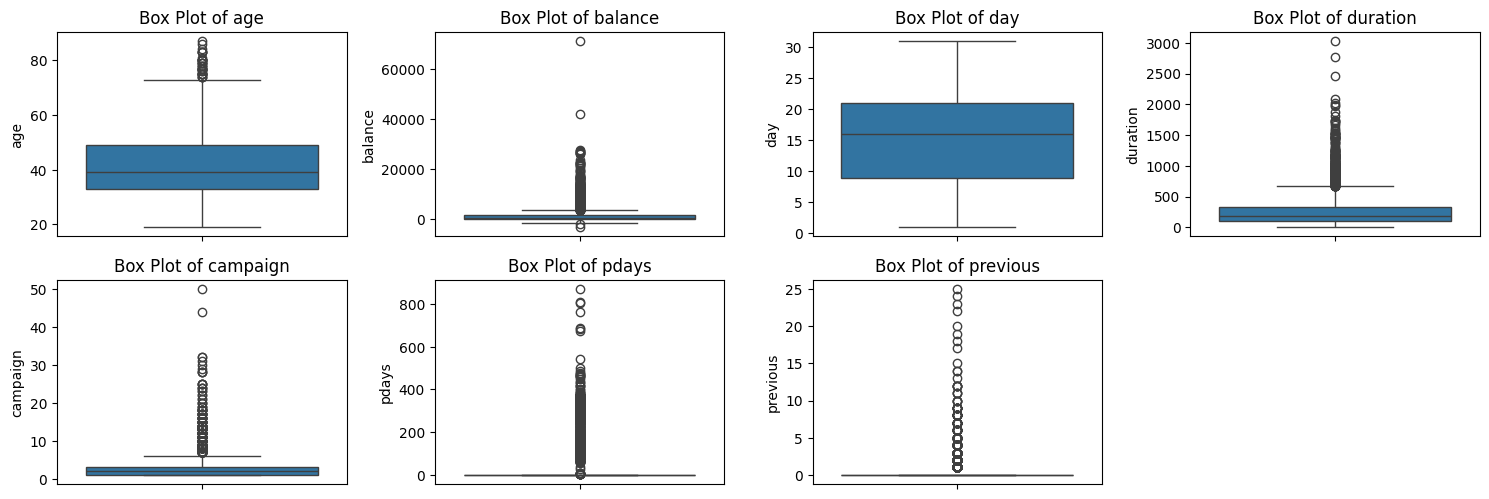

In [18]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot dimensions as needed
    sns.boxplot(y=df[column])  # Using df_filtered to show post-filtering data
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# Calculate IQR for numerical columns
Q1 = df[numerical_columns].quantile(0.25)  # 25th percentile
Q3 = df[numerical_columns].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Filtering the data to remove outliers
df_filtered = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')

Original data shape: (4521, 17)
Filtered data shape: (2803, 17)


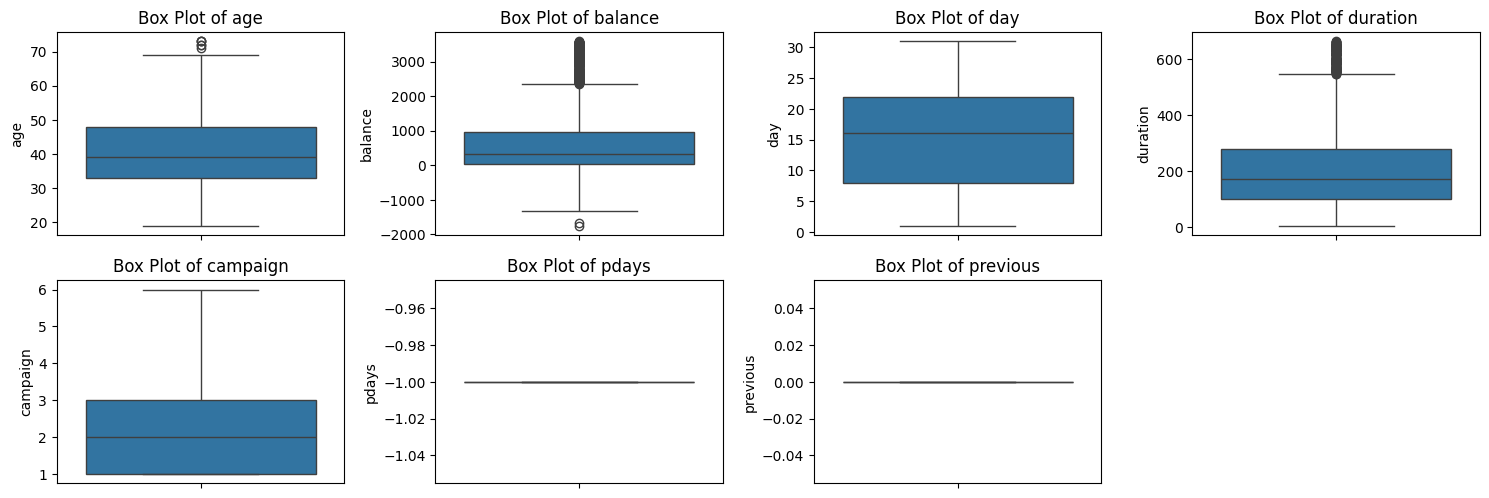

In [20]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot dimensions as needed
    sns.boxplot(y=df_filtered[column])  # Using df_filtered to show post-filtering data
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

### Feature Selecting

In [21]:
df_filtered = df.copy()  # Create a copy of the original DataFrame

# Remove columns with any null values
df_filtered.dropna(axis=1, how='any', inplace=True)

# Check if 'y' exists in df_filtered
if 'y' in df_filtered.columns:
    # Define features (X) and target (y)
    X = df_filtered.drop(columns=['y'])  # Features are all columns except 'y'
    y = df_filtered['y']  # Target variable
else:
    print("Column 'y' does not exist in the filtered DataFrame.")


### HeatMap

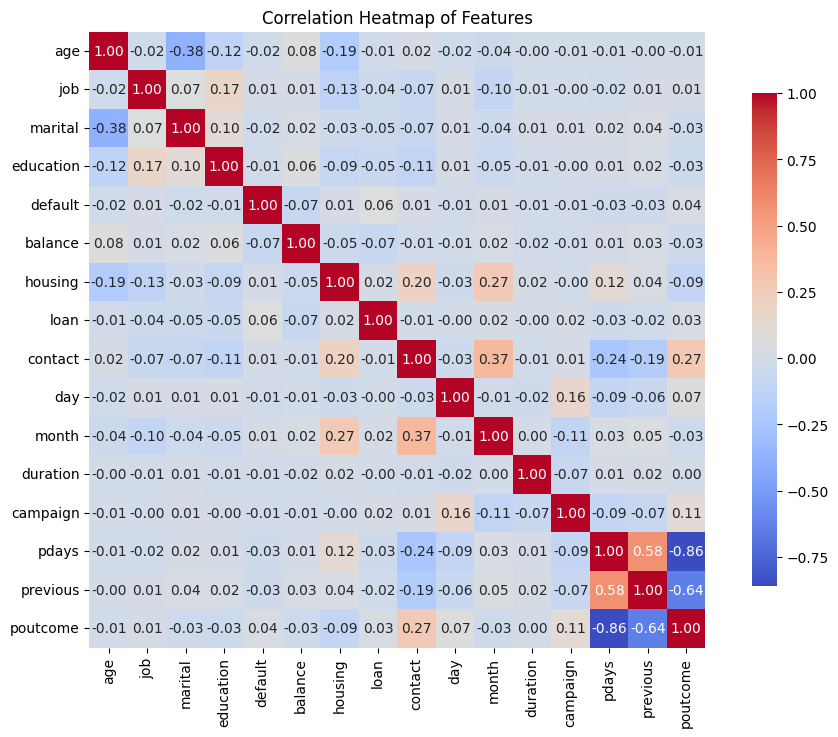

In [22]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

### Scaling and spliting

In [23]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Selection

In [24]:
# Creating and training the K-Nearest Neighbor (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors as default
knn_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

### Model Performance

Accuracy: 0.8906077348066298
Confusion Matrix:
 [[788  19]
 [ 80  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.49      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.70      0.58      0.60       905
weighted avg       0.86      0.89      0.87       905



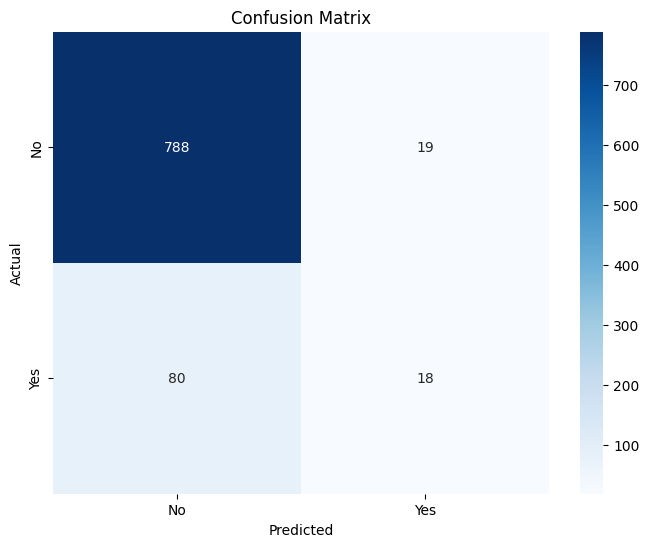

In [25]:
# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()